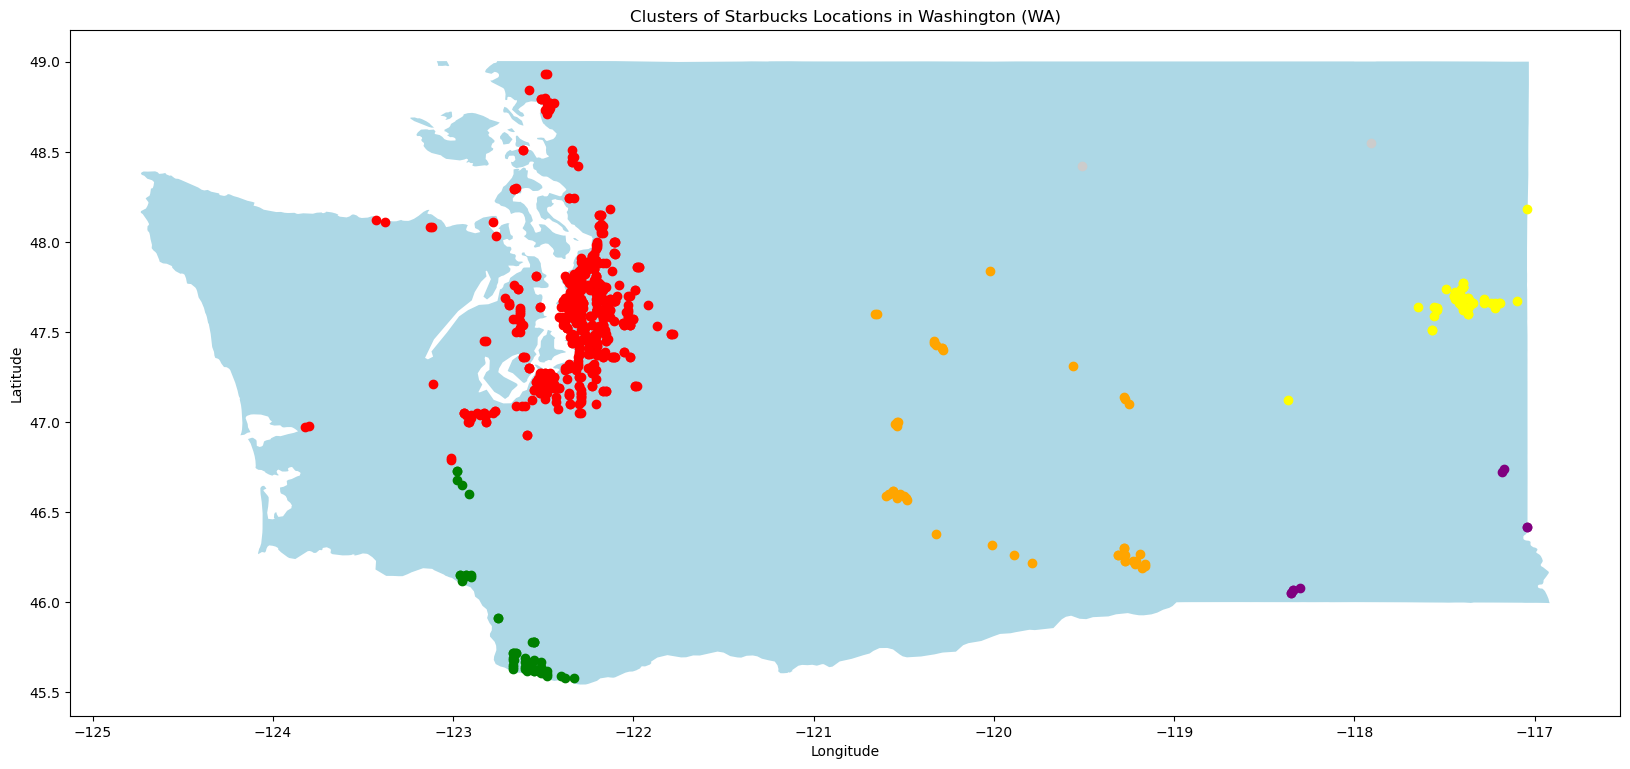

In [10]:
# Author: Hassan Ali
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

# Loading dataset
df = pd.read_csv('directory.csv')

# Filter Starbucks locations to only include those in Washington (WA) state
df = df[df["State/Province"] == 'WA'][["Longitude", "Latitude"]]

# Initialize MeanShift clustering algorithm and fit it on the locations
ms = MeanShift()
ms.fit(df)
cluster_centers = ms.cluster_centers_

# Load geographic data for plotting using the pyogrio engine to avoid Fiona errors
country = gpd.read_file('gz_2010_us_040_00_5m.json', engine="pyogrio")
Washington = country[country['NAME'] == 'Washington']

# Convert Starbucks locations into a GeoDataFrame for spatial analysis
df['coordinates'] = [Point(lon, lat) for lon, lat in zip(df['Longitude'], df['Latitude'])]
starbucks_geo = gpd.GeoDataFrame(df, geometry='coordinates')
starbucks_geo = starbucks_geo.assign(Color=ms.labels_)

# Define a set of colors for clusters (extend or modify as needed)
cluster_to_color = ['#ff0000', '#008000', '#ffff00', '#ffa500', '#800080', '#cccccc']

# Visualize the clusters of Starbucks locations across Washington state
fig, ax = plt.subplots(1, figsize=(20, 20))
Washington.plot(ax=ax, color='#add8e6')

# Plot each cluster with its associated color
unique_labels = starbucks_geo['Color'].unique()
for label in unique_labels:
    # Use modulo to safely index into our color list in case there are more clusters than colors
    starbucks_geo[starbucks_geo['Color'] == label].plot(ax=ax, color=cluster_to_color[label % len(cluster_to_color)])

plt.title("Clusters of Starbucks Locations in Washington (WA)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()